<a href="https://colab.research.google.com/github/dsklnr/dsklnr/blob/main/ML_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import re

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  Normalizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the JSON file and deal with missing enties

In [3]:
# Import modcloth_final_data.json
os.chdir('/content/drive/My Drive/')

data_list = []
with open('modcloth_final_data.json', 'r') as file:
    for line in file:
        try:
            data_list.append(json.loads(line))
        except json.JSONDecodeError:
            print("Warning: Skipping invalid JSON line.")

Convert the list to a dataframe

In [4]:
# Convert the list into a DataFrame
modcloth_data = pd.DataFrame(data_list)
modcloth_data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


Create a variable named ‘labels’ using the ‘quality’ column. These are the labels that we will use
for the rest of this assignment.

In [5]:
labels = modcloth_data['quality']

For the variables ‘waist’, ’size’, ’hips’, ‘bra size’, and ‘shoe size’ you can use
pd.to_numeric(modcloth_data[variable] to convert them to numerical values. Store
these in a data frame.

In [6]:
# Get waist, size, hips, bra size, and shoe size columns
variables = ['waist', 'size', 'hips', 'bra size', 'shoe size']

# Convert variables to numeric values and store in a dataframe
numeric_df = modcloth_data[variables].apply(pd.to_numeric, errors='coerce')
numeric_df.head()

,waist,size,hips,bra size,shoe size
0,29.0,7,38.0,34.0,NaN
1,31.0,13,30.0,36.0,NaN
2,30.0,7,NaN,32.0,9.0
3,NaN,21,NaN,NaN,NaN
4,NaN,18,NaN,36.0,NaN


For the next variable, ‘height’, the strings need some processing to convert them into numeric
values. You can use pd.apply to apply a transformation to the column of the data frame. Write a
short python function to convert these to a meaningful categorical variable: convert the strings to
height (in inches). Also, do this for the variable ‘bust’ - there are some outliers that could be
Page 2 of 5
handled by writing and applying another python function. Convert height and bust and store the
numeric values to the same data frame as the other numeric features.

In [7]:
# Convert the list into a DataFrame
modcloth_data = pd.DataFrame(data_list)

# Combined function to process height and bust
def convert_height_and_bust(row):
    # Convert height
    height_str = row['height']
    if isinstance(height_str, str):
        match = re.match(r"(\d+)ft (\d+)in", height_str)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            row['height'] = feet * 12 + inches
        else:
            row['height'] = None
    else:
        row['height'] = None

    # Convert bust
    bust_str = row['bust']
    if isinstance(bust_str, str):
        match = re.match(r"(\d+)", bust_str)
        if match:
            row['bust'] = int(match.group(1))
        else:
            row['bust'] = None
    else:
        row['bust'] = None

    return row

# Apply the combined function to each row of the DataFrame
modcloth_data = modcloth_data.apply(convert_height_and_bust, axis=1)

# Convert height and bust to numeric and add them to the numeric_data DataFrame
numeric_df['height'] = modcloth_data['height'].apply(pd.to_numeric, errors='coerce')
numeric_df['bust'] = modcloth_data['bust'].apply(pd.to_numeric, errors='coerce')
numeric_df.head()

,waist,size,hips,bra size,shoe size,height,bust
0,29.0,7,38.0,34.0,NaN,66.0,36.0
1,31.0,13,30.0,36.0,NaN,62.0,NaN
2,30.0,7,NaN,32.0,9.0,67.0,NaN
3,NaN,21,NaN,NaN,NaN,NaN,NaN
4,NaN,18,NaN,36.0,NaN,62.0,NaN


Plot the height using seaborn’s distplot function. You should see a normal distribution of height,
which should match your expectations for what the distribution of human heights should look
like.

<ipython-input-8-ed8bcd72252b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['height'].dropna(), kde=False, bins=50, norm_hist=True,


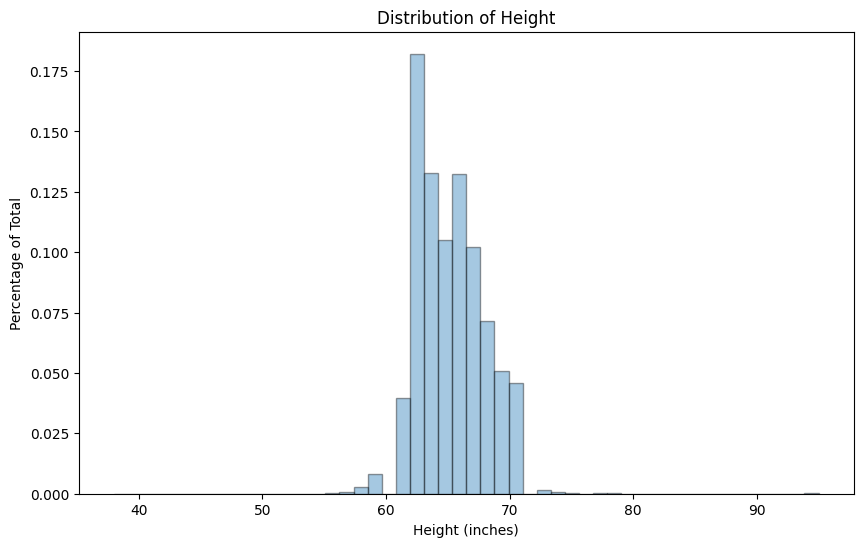

In [8]:
# Plot the height variable
plt.figure(figsize=(10, 6))
sns.distplot(numeric_df['height'].dropna(), kde=False, bins=50, norm_hist=True,
             hist_kws={'edgecolor': 'black'})
plt.title('Distribution of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Percentage of Total')
plt.show()

Make a plot of the waist data.

<ipython-input-9-d97c16edbc3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['waist'].dropna(), kde=False, bins=40, norm_hist=True,


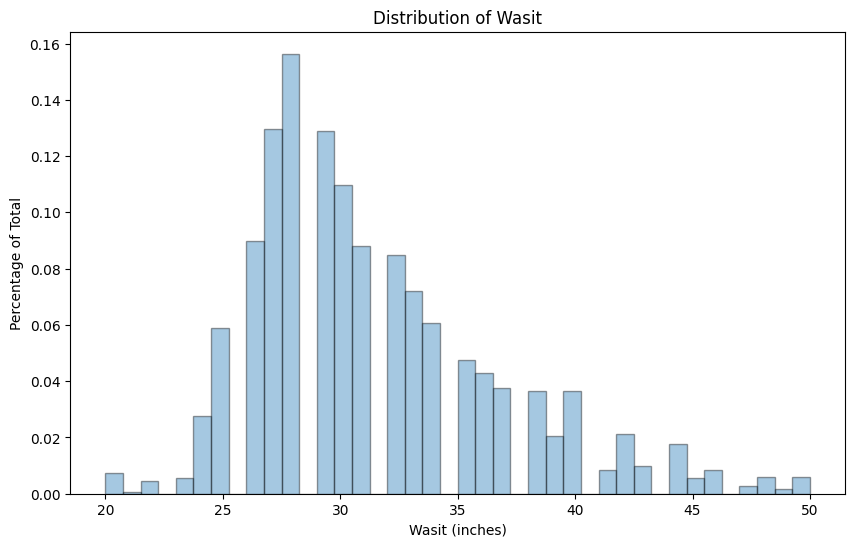

In [9]:
# Plot the waist variable
plt.figure(figsize=(10, 6))
sns.distplot(numeric_df['waist'].dropna(), kde=False, bins=40, norm_hist=True,
             hist_kws={'edgecolor': 'black'})
plt.title('Distribution of Wasit')
plt.xlabel('Wasit (inches)')
plt.ylabel('Percentage of Total')
plt.show()

For these values, ‘cup size’, ‘length’, ‘category’, use OneHotEncoder to convert these to a data
frame called cat_feat.

In [10]:
# Select categorical columns
cat_cols = ['cup size', 'length', 'category']
cat_data = modcloth_data[cat_cols].fillna('Unknown')

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical column's data
cat_feat = encoder.fit_transform(cat_data)

# Get feature names from categorical columns
feature_names = encoder.get_feature_names_out(cat_cols)

# Create a DataFrame with the encoded features
cat_feat = pd.DataFrame(cat_feat, columns=feature_names)
cat_feat.head()
cat_feat.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(82790, 26)

Use make_pipeline to compare these two classifiers:
balanced_model =
make_pipeline(,Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(,Perceptron())

Train a classifier using the data in cat_feat. Use train_test_split and test_size=0.50 to get a
50/50 train and test split

In [11]:
# Add the response variable to our categorical dataframe
cat_feat['quality'] = modcloth_data['quality']
cat_feat.head()

,cup size_Unknown,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,cup size_h,...,length_very long,length_very short,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,quality
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0


In [12]:
# Drop rows with null values in the 'quality' column
cat_feat = cat_feat.dropna(subset=['quality'])

# Split data into features
X = cat_feat
y = cat_feat['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Define the pipelines
balanced_model = make_pipeline(
    Perceptron(class_weight='balanced', random_state=42)
)

unbalanced_model = make_pipeline(
    Perceptron(random_state=42)
)

# Fit the models
balanced_model.fit(X_train, y_train)
unbalanced_model.fit(X_train, y_train)

# Predictions
y_pred_balanced = balanced_model.predict(X_test)
y_pred_unbalanced = unbalanced_model.predict(X_test)

Use metrics.plot_confusion_matrix and metrics.classification_report to report and visualize the
confusion matrix and results. Perform this for both the balanced and unbalanced models.

Balanced Model Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.42      0.59       665
         2.0       0.68      0.31      0.43      2581
         3.0       0.52      0.16      0.24      9739
         4.0       0.37      1.00      0.54     13622
         5.0       1.00      0.00      0.00     14754

    accuracy                           0.39     41361
   macro avg       0.71      0.38      0.36     41361
weighted avg       0.66      0.39      0.27     41361

Unbalanced Model Classification Report
              precision    recall  f1-score   support

         1.0       0.09      0.01      0.01       665
         2.0       0.00      0.00      0.00      2581
         3.0       0.41      0.96      0.57      9739
         4.0       0.90      0.21      0.34     13622
         5.0       0.97      1.00      0.99     14754

    accuracy                           0.65     41361
   macro avg       0.47      0.44      0.38     41361
w

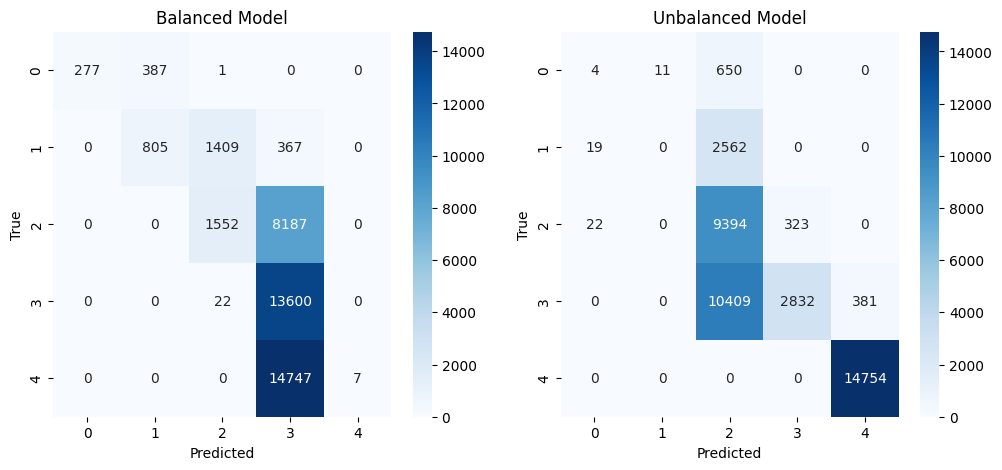

In [13]:
# Generate and print the classification report
print("Balanced Model Classification Report")
print(metrics.classification_report(y_test, y_pred_balanced))

print("Unbalanced Model Classification Report")
print(metrics.classification_report(y_test, y_pred_unbalanced))

# Compute confusion matrices
conf_matrix_balanced = metrics.confusion_matrix(y_test, y_pred_balanced)
conf_matrix_unbalanced = metrics.confusion_matrix(y_test, y_pred_unbalanced)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Balanced Model")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_unbalanced, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Unbalanced Model")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.show()

Next, you will add in data from the numeric features. Unfortunately, many of these values are
missing: not every JSON object will have a value for this numeric value. You will use imputation
as implemented in https://scikit-learn.org/stable/modules/impute.html to fill in the missing values
before classification: use SimpleImputer

In [14]:
# combines the two datasets
comb_df = pd.merge(cat_feat, numeric_df[numeric_df.index.isin(cat_feat.index)],left_index=True, right_index=True)

# list of numerical variables
variables = variables + ['height', 'bust']

# Impute missing values in numeric features
imputer = SimpleImputer(strategy='mean')
comb_df[variables] = imputer.fit_transform(comb_df[variables])
comb_df.head()

,cup size_Unknown,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,cup size_h,...,category_tops,category_wedding,quality,waist,size,hips,bra size,shoe size,height,bust
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,29.000000,7.0,38.000000,34.000000,8.146131,66.000000,36.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,31.000000,13.0,30.000000,36.000000,8.146131,62.000000,37.500887
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,30.000000,7.0,40.358159,32.000000,9.000000,67.000000,37.500887
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,31.325009,21.0,40.358159,35.972238,8.146131,65.244919,37.500887
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,31.325009,18.0,40.358159,36.000000,8.146131,62.000000,37.500887


Next, you will create three pipelines. Create one pipeline using SimpleImputer to impute the
missing values and the balanced perceptron. Next, create a pipeline using
preprocessing.Normalizer(). Finally, create a different pipeline using
preprocessing.StandardScaler().
For each of the pipeline,l do fivefold cross-validation, using
scores = cross_val_score(model, X, y, cv=5,scoring=’accuracy’) to compute
the accuracy of each of the pipelines.
Create a table, with a row (labeled) for each pipeline you created. The table should report the
maximum, minimum, and mean of accuracy for each of the pipelines.

In [15]:
# Split data into features
X = comb_df
y = comb_df['quality']

# Define the pipelines
pipeline_imputer = make_pipeline(
    SimpleImputer(strategy='mean'),
    Perceptron(class_weight='balanced', random_state=42)
)

pipeline_normalizer = make_pipeline(
    Normalizer(),
    Perceptron(class_weight='balanced', random_state=42)
)

pipeline_scaler = make_pipeline(
    StandardScaler(),
    Perceptron(class_weight='balanced', random_state=42)
)

# Perform fivefold cross-validation
scores_imputer = cross_val_score(pipeline_imputer, X, y, cv=5, scoring='accuracy')
scores_normalizer = cross_val_score(pipeline_normalizer, X, y, cv=5, scoring='accuracy')
scores_scaler = cross_val_score(pipeline_scaler, X, y, cv=5, scoring='accuracy')

# Create a table with the results
results = {
    'Pipeline': ['SimpleImputer and Perceptron', 'Normalizer and Perceptron', 'StandardScaler and Perceptron'],
    'Maximum Accuracy': [scores_imputer.max(), scores_normalizer.max(), scores_scaler.max()],
    'Minimum Accuracy': [scores_imputer.min(), scores_normalizer.min(), scores_scaler.min()],
    'Mean Accuracy': [scores_imputer.mean(), scores_normalizer.mean(), scores_scaler.mean()]
}

# display results in a table
results_df = pd.DataFrame(results)
results_df

,Pipeline,Maximum Accuracy,Minimum Accuracy,Mean Accuracy
0,SimpleImputer and Perceptron,0.745890,0.546268,0.655255
1,Normalizer and Perceptron,0.600967,0.246313,0.522387
2,StandardScaler and Perceptron,0.770323,0.679944,0.730809


Finally, you will use the words in the consumer reviews to build a classifier to predict the results.

corpus = modcloth_data['review_text']

Create a new variable from the text data, after removing outliers, which are records that contain
no text data (these will be nans in your data frame). This new variable is a list of strings, where
every string is a consumer review

In [16]:
# Remove outliers: filter out records with no text data (NaNs)
filtered_reviews = modcloth_data.dropna(subset=['review_text', 'quality'])

# Create a variable that holdsa review text
corpus = filtered_reviews['review_text'].tolist()

# Display the first 5 items in the list
corpus[:5]

['I liked the color, the silhouette, and the fabric of this dress. But the ruching just looked bunchy and ruined the whole thing. I was so disappointed, I really waned to like this dress. Runs a little small; I would need to size up to make it workappropriate.',
 "From the other reviews it seems like this dress either works for your body type or it doesn't. I have a small waist but flabby tummy and this dress is perfect for me! The detail around the front hides everything and the clingyness of the dress makes me look curvier than usual. The material is thick but clings to your bum (enough that when you walk the bum jiggle shows through!) and the slit is a bit high so it's not necessarily office appropriate without tights, but it's a good dress with tights or for an occasion.",
 "I love the design and fit of this dress!  I wore it to a wedding and was comfortable all evening. The color is really pretty in person too!  The fabric quality seems decent but not great so I'm not sure how man

Pass this new variable to sklearn’sTfidfVectorizer (https://scikit-
learn.org/stable/modules/feature_extraction.html#text-feature-extraction) to load the data.
Create a new dataframe called X from the bag of words features, using
pd.DataFrame.sparse.from_spmatrix, and subset the labels to only those which have text data
present

In [17]:
# Use TfidfVectorizer to convert the text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

# Create a new dataframe from the sparse matrix
X = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=vectorizer.get_feature_names_out())

# Subset the labels to only those which have text data present
y = filtered_reviews['quality']

In [18]:
# Display the first 5 rows of X
X.head()

,00,000,00pm,01,02,04,0f,0p,0s,0x,...,zipup,zipzip,zoiks,zoinks,zomg,zone,zones,zoo,zooey,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# display the first 5 rows of y
y.head()

6725    4.0
6726    5.0
6727    3.0
6728    3.0
6729    5.0
Name: quality, dtype: float64

Next, use feature selection (https://scikit-
learn.org/stable/modules/feature_selection.html#feature-selection) to subset the text data to
only the most relevant features. Be sure to do this based on the training set, then apply the
transformation to the test set. Using the pipeline can make this step easier.

Use SelectKBest and chi-2 to select features. Make sure you have the latest version (at least
0.24 of scikit-learn, or you may get errors). Print a list of the top ten features selected. Hint: Use
vectorizer.get_feature_names(), XKBest.fit() and then XNew.get_support().

For k in the range [10,25,50,100,250,500,1000,10000], plot the accuracy of the classifier
for each value of k. Your plot should look like the one below

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Define the pipeline with feature selection
pipeline = make_pipeline(
    SelectKBest(score_func=chi2, k=500),
    Perceptron(class_weight='balanced', random_state=42)
)

# Perform cross-validation and calculate scores
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_score = pipeline.score(X_test, y_test)

# Create a table with the results
results = {
    'Max Accuracy': [scores.max()],
    'Min Accuracy': [scores.min()],
    'Mean Accuracy': [scores.mean()],
    'Test Set Accuracy': [test_score]
}

results_df = pd.DataFrame(results, index=['SelectKBest and Perceptron'])

# Display the results
print(results_df)

                          Max Accuracy  Min Accuracy  Mean Accuracy  \
SelectKBest + Perceptron      0.393289      0.314079       0.347079   

                          Test Set Accuracy  
SelectKBest + Perceptron           0.365132  


In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.50, random_state=42)

# Define the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Define the range for k
k_values = [10, 25, 50, 100, 250, 500, 1000, 10000]

# Initalize the results
results = []

# Iterate over each k value in k_values
for k in k_values:
    # Define the pipeline with feature selection
    pipeline = make_pipeline(
        vectorizer,
        SelectKBest(score_func=chi2, k=k),
        Perceptron(class_weight='balanced', random_state=42)
    )

    # Perform cross-validation and calculate scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    results.append(mean_score)
    print(f"k={k}: Mean Accuracy = {mean_score}")

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Show the top 10 features selected
    selector = pipeline.named_steps['selectkbest']
    selected_features = selector.get_support(indices=True)
    feature_names = vectorizer.get_feature_names_out()
    top_features = [feature_names[i] for i in selected_features[:10]]
    print(f"Top 10 features for k={k}: {top_features}\n")

k=10: Mean Accuracy = 0.32294736842105265
Top 10 features for k=10: ['cheap', 'disappointed', 'love', 'perfect', 'poor', 'returned', 'ripped', 'terrible', 'thin', 'was']

k=25: Mean Accuracy = 0.29747368421052633
Top 10 features for k=25: ['after', 'cheap', 'cheaply', 'didn', 'disappointed', 'fabric', 'favorite', 'felt', 'hole', 'itchy']

k=50: Mean Accuracy = 0.3400263157894737
Top 10 features for k=50: ['absolutely', 'after', 'amazing', 'apart', 'awful', 'beautiful', 'cheap', 'cheaply', 'colors', 'cute']

k=100: Mean Accuracy = 0.3410526315789474
Top 10 features for k=100: ['absolutely', 'after', 'amazing', 'apart', 'awful', 'awkward', 'back', 'barley', 'beautiful', 'began']

k=250: Mean Accuracy = 0.3447631578947369
Top 10 features for k=250: ['absolutely', 'adore', 'after', 'amazing', 'and', 'apart', 'appalling', 'appearded', 'arms', 'awful']

k=500: Mean Accuracy = 0.34460526315789475
Top 10 features for k=500: ['10year', '60', '70', '77', 'absolute', 'absolutely', 'accumulating',

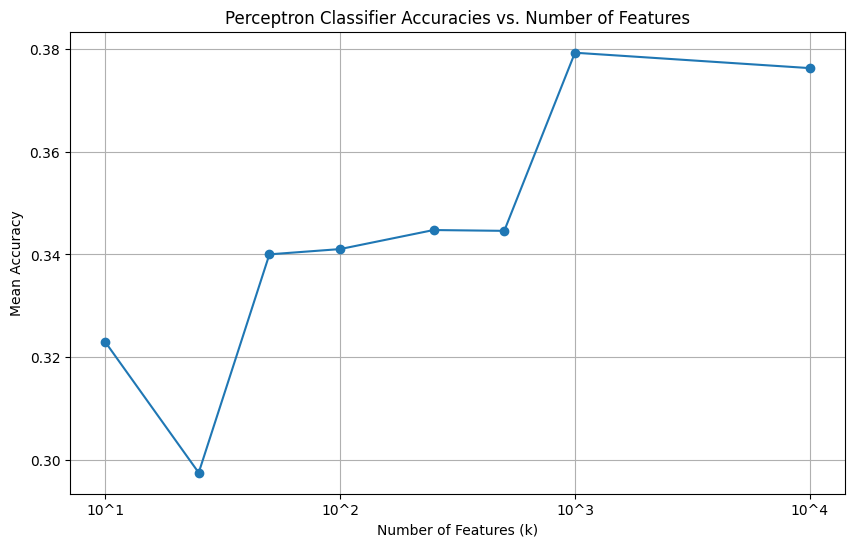

In [22]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.log10(k_values), results, marker='o')
plt.xticks(np.log10([10, 100, 1000, 10000]), labels=['10^1', '10^2', '10^3', '10^4'])
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean Accuracy')
plt.title('Perceptron Classifier Accuracies vs. Number of Features')
plt.grid(True)
plt.show()